In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import re


In [3]:
df = pd.read_csv("netflix.csv")
df

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018
...,...,...,...,...,...,...,...
578,Rolling Thunder Revue: A bob Dylan Story by Ma...,Documentary,English,7.6,6/12/2019,144,2019
579,Freaks: You're One of Us,Supernatural drama,German,5.4,9/2/2020,92,2020
580,Squared Love,Romantic comedy,Polish,5.0,2/11/2021,102,2021
581,My Own Man,Documentary,English,6.4,12/13/2014,81,2014


In [3]:
df.head()

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018


In [4]:
df.tail()

,title,genre,language,imdb_score,premiere,runtime,year
578,Rolling Thunder Revue: A bob Dylan Story by Ma...,Documentary,English,7.6,6/12/2019,144,2019
579,Freaks: You're One of Us,Supernatural drama,German,5.4,9/2/2020,92,2020
580,Squared Love,Romantic comedy,Polish,5.0,2/11/2021,102,2021
581,My Own Man,Documentary,English,6.4,12/13/2014,81,2014
582,Biggie: I Got a Story to Tell,Documentary,English,6.9,3/1/2021,97,2021


In [35]:
df = df.drop_duplicates()
df.shape

(583, 7)

In [36]:
df['title'] = df['title'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x))

In [37]:
df.columns.values

array(['title', 'genre', 'language', 'imdb_score', 'premiere', 'runtime',
       'year'], dtype=object)

In [38]:
df.isna().sum()

title         0
genre         0
language      0
imdb_score    0
premiere      0
runtime       0
year          0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       583 non-null    object        
 1   genre       583 non-null    object        
 2   language    583 non-null    object        
 3   imdb_score  583 non-null    float64       
 4   premiere    583 non-null    datetime64[ns]
 5   runtime     583 non-null    int64         
 6   year        583 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 32.0+ KB


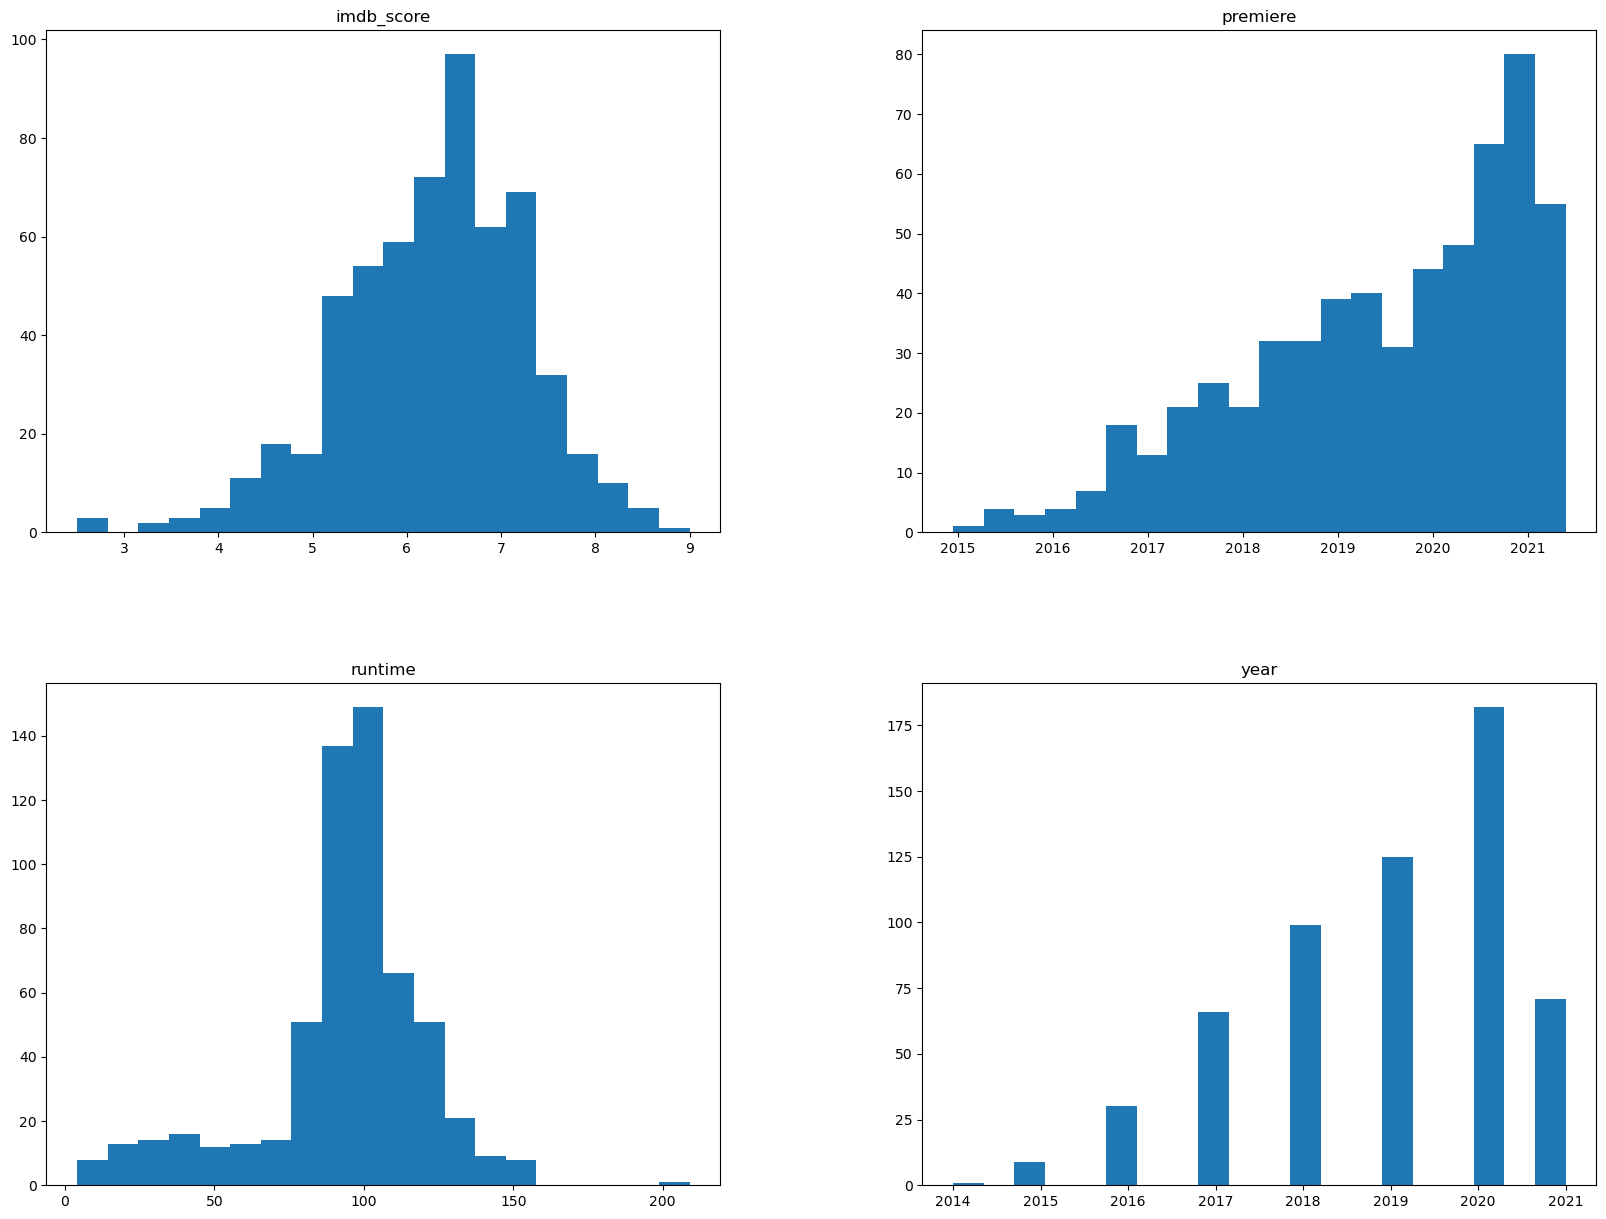

In [40]:
#histograms of all numeric values
df.hist(bins = 20, grid = False, figsize = (20,15))
plt.show()

In [41]:
df['premiere'] = pd.to_datetime(df['premiere'])

In [42]:
df

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,2020-11-24,83,2020
1,To Each Her Own,Romantic comedy,French,5.3,2018-06-24,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,2020-05-22,87,2020
3,The Perfection,Horror-thriller,English,6.1,2019-05-24,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,2018-03-30,78,2018
...,...,...,...,...,...,...,...
578,Rolling Thunder Revue A bob Dylan Story by Mar...,Documentary,English,7.6,2019-06-12,144,2019
579,Freaks Youre One of Us,Supernatural drama,German,5.4,2020-09-02,92,2020
580,Squared Love,Romantic comedy,Polish,5.0,2021-02-11,102,2021
581,My Own Man,Documentary,English,6.4,2014-12-13,81,2014


In [43]:
df.describe()

,imdb_score,premiere,runtime,year
count,583.000000,583,583.000000,583.000000
mean,6.275129,2019-06-19 17:02:34.373927936,93.490566,2018.934820
min,2.500000,2014-12-13 00:00:00,4.000000,2014.000000
25%,5.700000,2018-06-26 12:00:00,86.000000,2018.000000
50%,6.400000,2019-10-16 00:00:00,97.000000,2019.000000
75%,7.000000,2020-09-19 12:00:00,107.500000,2020.000000
max,9.000000,2021-05-27 00:00:00,209.000000,2021.000000
std,0.976678,NaN,27.706665,1.474598


In [44]:
Questions = ["1. Which genre has the highest number of movies in the dataset?",
             "2. Which year the highest number of movies were released ??",
             "3. Which movie has the longest runtime?",
             "4. What are the Top 10 movies based on IMDb score",
             "5. Which are the top 5 languages with the most movies in the dataset"]
Questions

['1. Which genre has the highest number of movies in the dataset?',
 '2. Which year the highest number of movies were released ??',
 '3. Which movie has the longest runtime?',
 '4. What are the Top 10 movies based on IMDb score',
 '5. Which are the top 5 languages with the most movies in the dataset']

In [45]:
max_count = genre_counts.max()
max_count


159

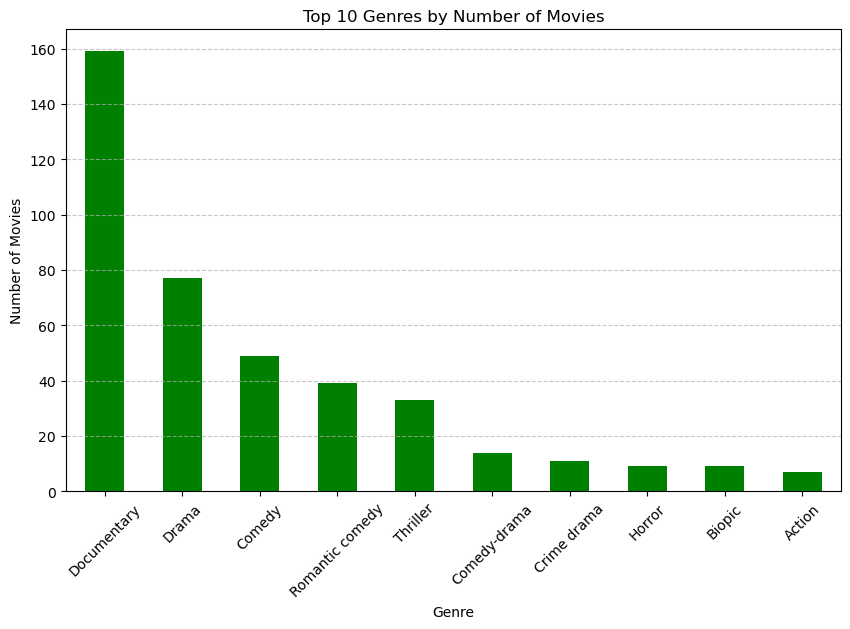

In [46]:
#1 Which genre has the highest number of movies in the dataset

genre_counts = df['genre'].value_counts()

# Select the top 10 genres
top_genres = genre_counts.head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='green')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Top 10 Genres by Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

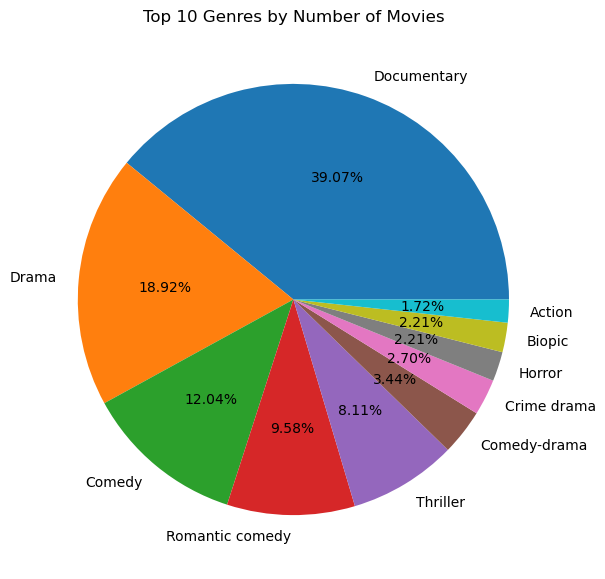

In [47]:
plt.figure(figsize=(10, 7))
plt.pie(top_genres, labels=top_genres.index, autopct="%0.2f%%")
plt.title('Top 10 Genres by Number of Movies')
plt.show()

In [21]:
#Documentary genre has the maximum number of movies 


The year with the maximum number of movies released in year 2020 with 182 movies.


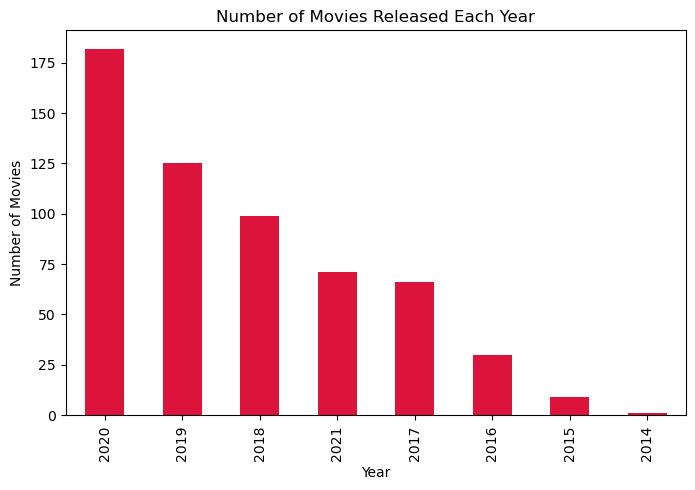

In [48]:
#2.Which year had the highest number of movie releases?
movies_per_year = df['year'].value_counts()


max_year = movies_per_year.idxmax()
max_count = movies_per_year.max()


print(f"The year with the maximum number of movies released in year {max_year} with {max_count} movies.")

# Plotting the bar chart
plt.figure(figsize=(8, 5))
movies_per_year.plot(kind='bar', color='crimson')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')


# Show the plot
plt.show()

C:\Users\rasto\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


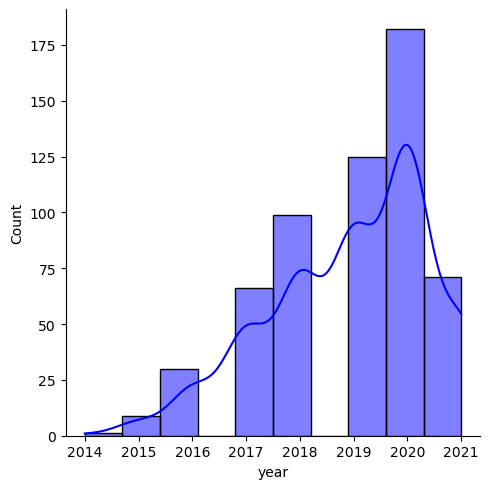

In [49]:
sns.displot(x = "year", data = df, bins = 10, kde = True, color = "blue")
plt.show()

In [ ]:
#In year 2020 maximum number of movies were released

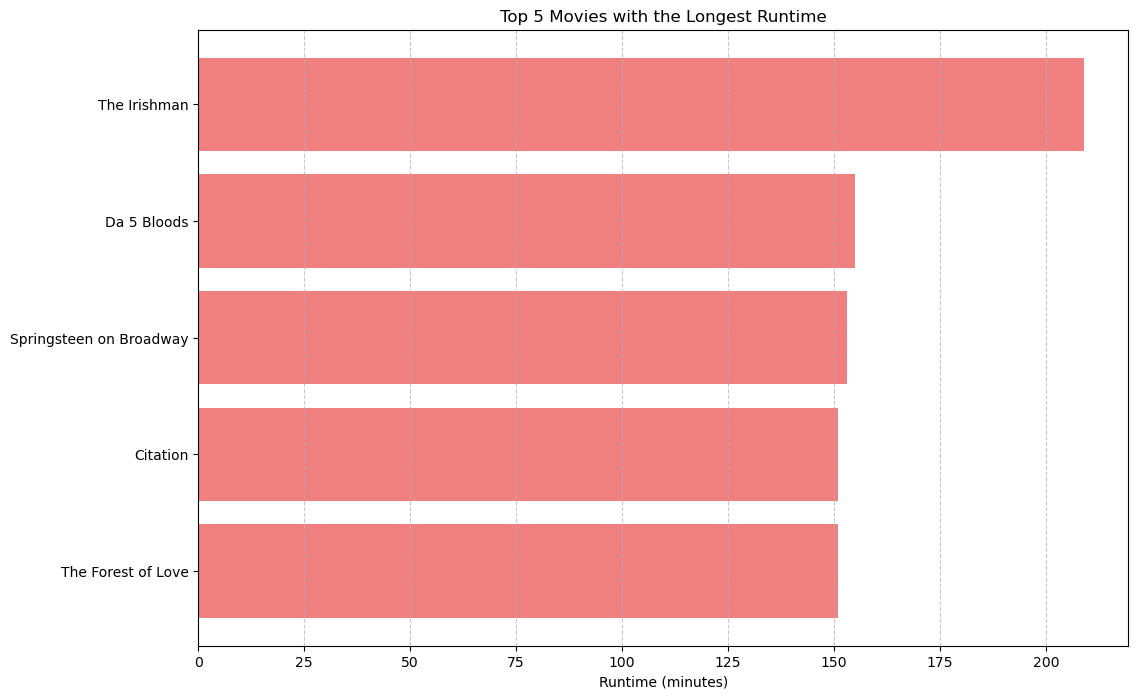

In [50]:
# 3 Which movie has the longest runtime
sorted_df = df.sort_values(by='runtime', ascending=False)

# Select the top 10 movies with the longest runtime
top_5_longest_runtime = sorted_df.head(5)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_5_longest_runtime['title'], top_5_longest_runtime['runtime'], color='lightcoral')
plt.xlabel('Runtime (minutes)')
#plt.ylabel('Movie Title')
plt.title('Top 5 Movies with the Longest Runtime')
plt.gca().invert_yaxis()  # Invert y-axis to have the longest runtime at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
#The Irishman has the longest runtime

In [25]:
#4 What are the Top 10 movies based on IMDb score
top_10_movies = df.sort_values(by = "imdb_score", ascending = False).head(10)
top_10_movies

,title,genre,language,imdb_score,premiere,runtime,year
285,David Attenborough A Life on Our Planet,Documentary,English,9.0,2020-10-04,83,2020
268,Emicida AmarElo Its All For Yesterday,Documentary,Portuguese,8.6,2020-12-08,89,2020
72,Springsteen on Broadway,One-man show,English,8.5,2018-12-16,153,2018
515,Taylor Swift Reputation Stadium Tour,Concert Film,English,8.4,2018-12-31,125,2018
410,Ben Platt Live from Radio City Music Hall,Concert Film,English,8.4,2020-05-20,85,2020
214,Winter on Fire Ukraines Fight for Freedom,Documentary,English/Ukranian/Russian,8.4,2015-10-09,91,2015
331,Dancing with the Birds,Documentary,English,8.3,2019-10-23,51,2019
101,Cuba and the Cameraman,Documentary,English,8.3,2017-11-24,114,2017
179,13th,Documentary,English,8.2,2016-10-07,100,2016
519,The Three Deaths of Marisela Escobedo,Documentary,Spanish,8.2,2020-10-14,109,2020


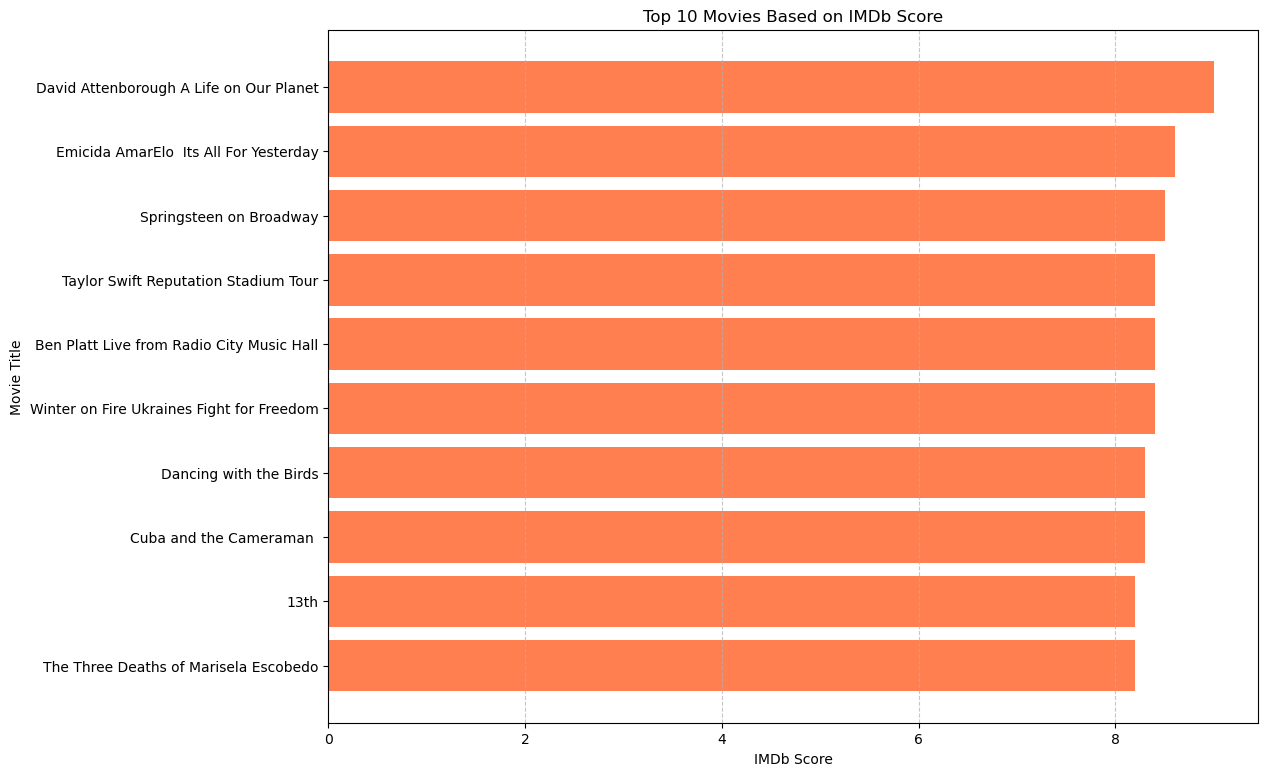

In [51]:
plt.figure(figsize=(12, 9))
plt.barh(top_10_movies["title"], top_10_movies["imdb_score"], color = "coral")
plt.xlabel('IMDb Score')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies Based on IMDb Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()

In [27]:
#David Attenborough A Life on Our Planet has the highest IMDb score among all the movies in the dataset

In [52]:
#5 Which are the top 5 languages with the most movies in the dataset

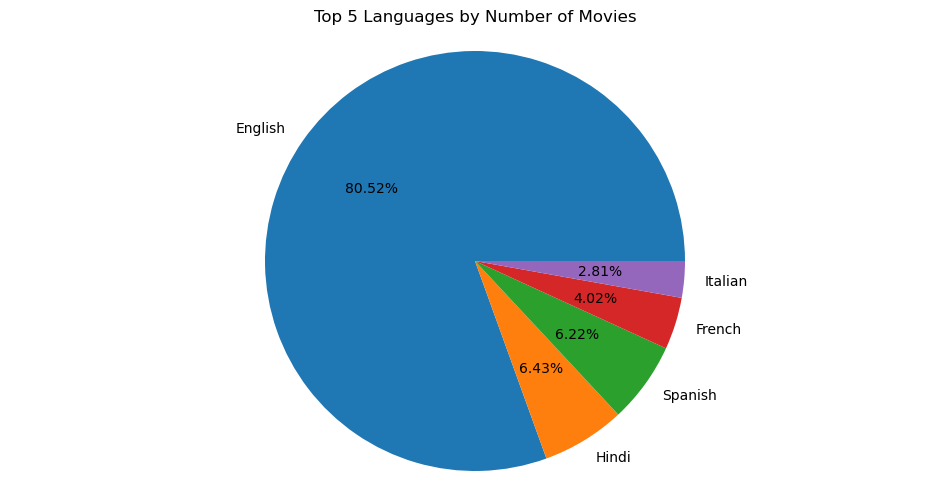

In [53]:
language_counts = df['language'].value_counts()

# Select the top 5 languages
top_languages = language_counts.head(5)

# Plotting the pie chart for the top 5 languages
plt.figure(figsize=(12, 6))
plt.pie(top_languages, labels=top_languages.index, autopct='%0.2f%%')
plt.title('Top 5 Languages by Number of Movies')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.show()

# English is the Language with the most movies in dataset

In [30]:
#6 What is the Average IMDb score  

In [ ]:
#Average IMDb score is 6.28

C:\Users\rasto\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


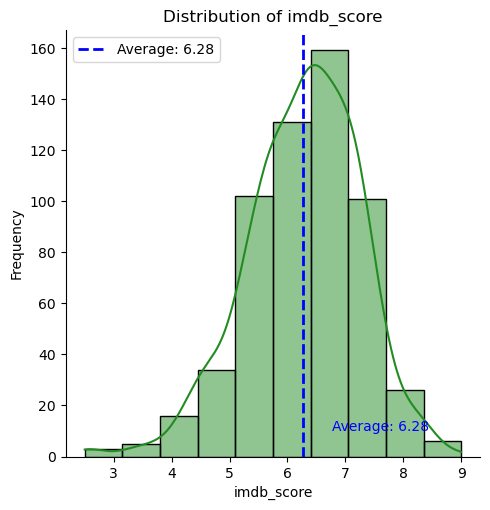

In [54]:
average_imdb_score = df["imdb_score"].mean()

#distribution plot
sns.displot(x="imdb_score", data=df, bins=10, kde=True, color="forestgreen")

# Add a vertical line for the average IMDb score
plt.axvline(average_imdb_score, color='blue', linestyle='--', linewidth=2, label=f'Average: {average_imdb_score:.2f}')

# Add a text annotation for the average IMDb score
plt.text(average_imdb_score + 0.5, 10, f'Average: {average_imdb_score:.2f}', color='blue')

# Show the legend
plt.title('Distribution of imdb_score')
plt.xlabel('imdb_score')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()